In [42]:
from analysis_script import *

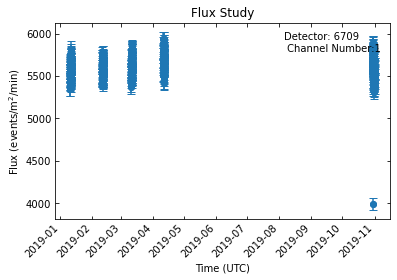

In [43]:
flux_0, error_0 = scatter_flux('0_angle_data.csv')

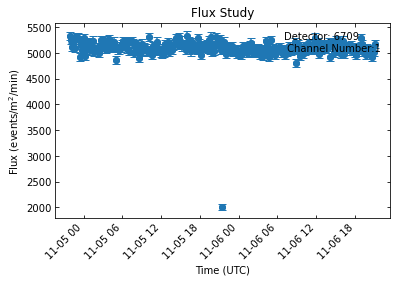

In [44]:
flux_15, error_15 = scatter_flux('15_angle_data.csv')

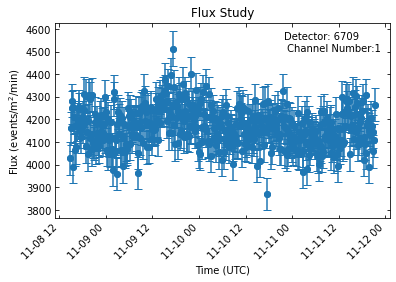

In [45]:
flux_30, error_30 = scatter_flux('30_angle_data_fix.csv')

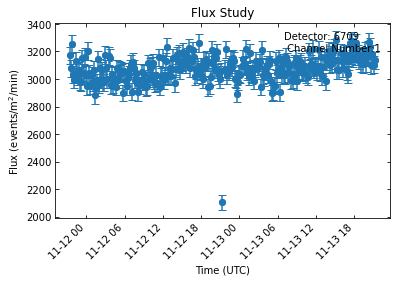

In [46]:
flux_45, error_45 = scatter_flux('45_angle_data.csv')

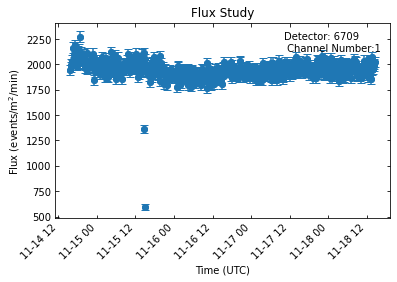

In [47]:
flux_60, error_60 = scatter_flux('60_angle_data.csv')

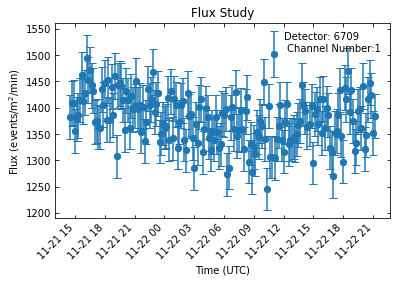

In [48]:
flux_75, error_75 = scatter_flux('75_angle_data_fix.csv')

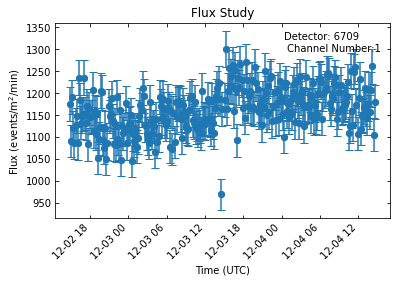

In [49]:
flux_90, error_90 = scatter_flux('90_angle_data.csv')

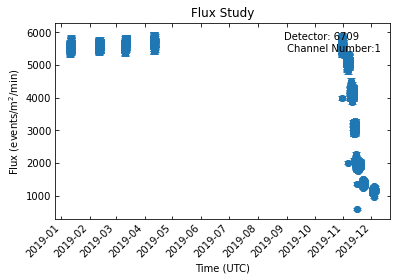

In [50]:
flux_all, error_all = scatter_flux('all_angles.csv')

In [51]:
remove_outlier(flux_all,error_all)

### Fit data

A: 1182.74643 B: 4369.64723 n: 2.51983
std of n:  0.009735953671194912
percent error:  25.991679781850195


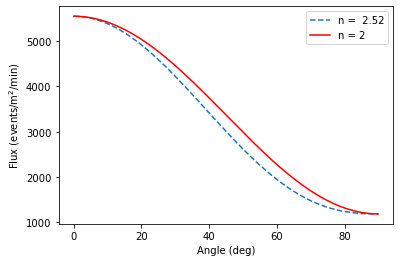

In [52]:
from scipy.optimize import curve_fit

angles =  []

z = 0
while z < len(flux_0):
    angles.append(0)
    z += 1
f = 0
while f < len(flux_15):
    angles.append(15)
    f += 1
t = 0
while t < len(flux_30):
    angles.append(30)
    t += 1
fo = 0
while fo < len(flux_45):
    angles.append(45)
    fo += 1
s = 0
while s < len(flux_60):
    angles.append(60)
    s += 1
se = 0
while se < len(flux_75):
    angles.append(75)
    se += 1
ni = 0
while ni < len(flux_90):
    angles.append(90)
    ni += 1

rad_angles = [a * (np.pi / 180) for a in angles]

def objective(angle, A, B, n):
    return A + B * (np.cos(angle)**(n)) 

popt, var = curve_fit(objective, rad_angles, flux_all, p0=[1208, 4266, 2], sigma = error_all, maxfev = 8000)

A, B, n = popt
print('A: %.5f B: %.5f n: %.5f' % (A, B, n))

#covariance matrix
#print(var)

#one std errors of parameters
perr = np.sqrt(np.diag(var))
print('std of n: ', perr[2])

d = (n - 2) / 2
print('percent error: ', d*100)

fit = objective(rad_angles, A, B, n)
ideal = objective(rad_angles, A, B, 2)

x = np.arange(0, 90, 0.1)
y_ideal = A + B * (np.cos(x * np.pi/180)**2)
y_fit = A + B * (np.cos(x * np.pi/180)**n)

plt.plot(x, y_fit, linestyle='dashed', label='n = %5.2f' %n)
plt.plot(x,y_ideal, c='r', label='n = 2')

plt.xlabel('Angle (deg)')
plt.ylabel('Flux (events/m$^2$/min)')
plt.legend()
plt.show()


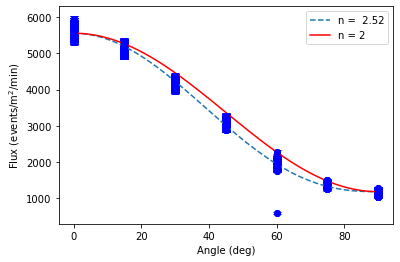

In [53]:
angles =  [0, 15, 30, 45, 60, 75, 90]

remove_outlier(flux_0, error_0)
remove_outlier(flux_15, error_15)
remove_outlier(flux_30, error_30)
remove_outlier(flux_45, error_45)
remove_outlier(flux_60, error_60)
remove_outlier(flux_75, error_75)
remove_outlier(flux_90, error_90)

fluxs =  [flux_0, flux_15, flux_30, flux_45,  flux_60,  flux_75,  flux_90]
errs = [error_0, error_15, error_30, error_45, error_60, error_75, error_90]

for xe, ye, ee in zip(angles, fluxs, errs):
    plt.scatter([xe] * len(ye), ye, color='blue')
    plt.errorbar([xe] * len(ye), ye, yerr=ee, fmt='o', capsize=4, color='blue')

#get x and y data
x = np.arange(0, 90, 0.1)
y_ideal = A + B * (np.cos(x * np.pi/180)**2)
y_fit = A + B * (np.cos(x * np.pi/180)**n)

#plot model and fit
plt.plot(x, y_fit, linestyle='dashed', label='n = %5.2f' %n)
plt.plot(x,y_ideal, c='r', label='n = 2')


plt.xlabel('Angle (deg)')
plt.ylabel('Flux (events/m$^2$/min)')
plt.legend()
plt.show()

[63.846829954421075, -78.88192198925111, -59.506376577344085, 71.20444183074687, -0.12832095895813056, 51.17394301349425, -19.377823314341974]


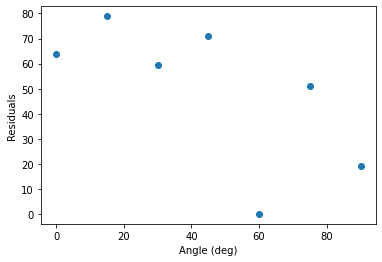

In [54]:
res0 = [(f - objective(0, A, B, n)) for f in flux_0]
res15 = [(f - objective(15*(np.pi/180), A, B, n)) for f in flux_15]
res30 = [(f - objective(30*(np.pi/180), A, B, n)) for f in flux_30]
res45 = [(f - objective(45*(np.pi/180), A, B, n)) for f in flux_45]
res60 = [(f - objective(60*(np.pi/180), A, B, n)) for f in flux_60]
res75 = [(f - objective(75*(np.pi/180), A, B, n)) for f in flux_75]
res90 = [(f - objective(90*(np.pi/180), A, B, n)) for f in flux_90]

ress = [res0, res15, res30, res45, res60, res75, res90]
means = [np.mean(r) for r in ress]
print(means)
mag_means = [abs(m) for m in means]

plt.scatter([0,15,30,45,60,75,90], mag_means)
plt.xlabel('Angle (deg)')
plt.ylabel('Residuals')
plt.show()

### Get R$^2$ coefficient

In [55]:
from sklearn.metrics import r2_score
y_pred = objective(rad_angles, A, B, n)
r2_score(flux_all, y_pred)

0.9945057234787298